# Transformer in Time Series dataset:
# Classifier-Regressor Transformer :)
Jason's toy Transformer model for predicting future trend in EU wind
The front is a classifier, since any NN model has the highest efficiency at classifier mode rather than regressor mode.
Use interpolation to convert input into integer, since we can interpolate them into a lot of ints, we expect a very low loss in precision
Regressor for output

EU dataset: https://www.kaggle.com/sohier/30-years-of-european-wind-generation

# What's new here
1. Multi-parameter version of transformer :)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

import os


In [4]:
# Let's do Transformer :)

# read EU wind data
data_path_eu = "Data/Europe_wind/"
# TS is based on smaller regime, but EMHIRESPV is for countries
# data is for each hour

TS = pd.read_csv(data_path_eu+ "TS.CF.N2.30yr.csv")

EMHIRESPV_TSh_CF_Country_19862015 = pd.read_csv(data_path_eu+"EMHIRESPV_TSh_CF_Country_19862015.csv")
date_array = [datetime.datetime(1986, 1, 1) + datetime.timedelta(hours=i) for i in range(TS.shape[0])]
TS["time_stamp"] = date_array
EMHIRESPV_TSh_CF_Country_19862015["time_stamp"] = date_array
os.listdir(data_path_eu)

['emhires_dataset_part_i_wind_power_generation_0.pdf',
 'EMHIRESPV_TSh_CF_Country_19862015.csv',
 'TS.CF.N2.30yr.csv']

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


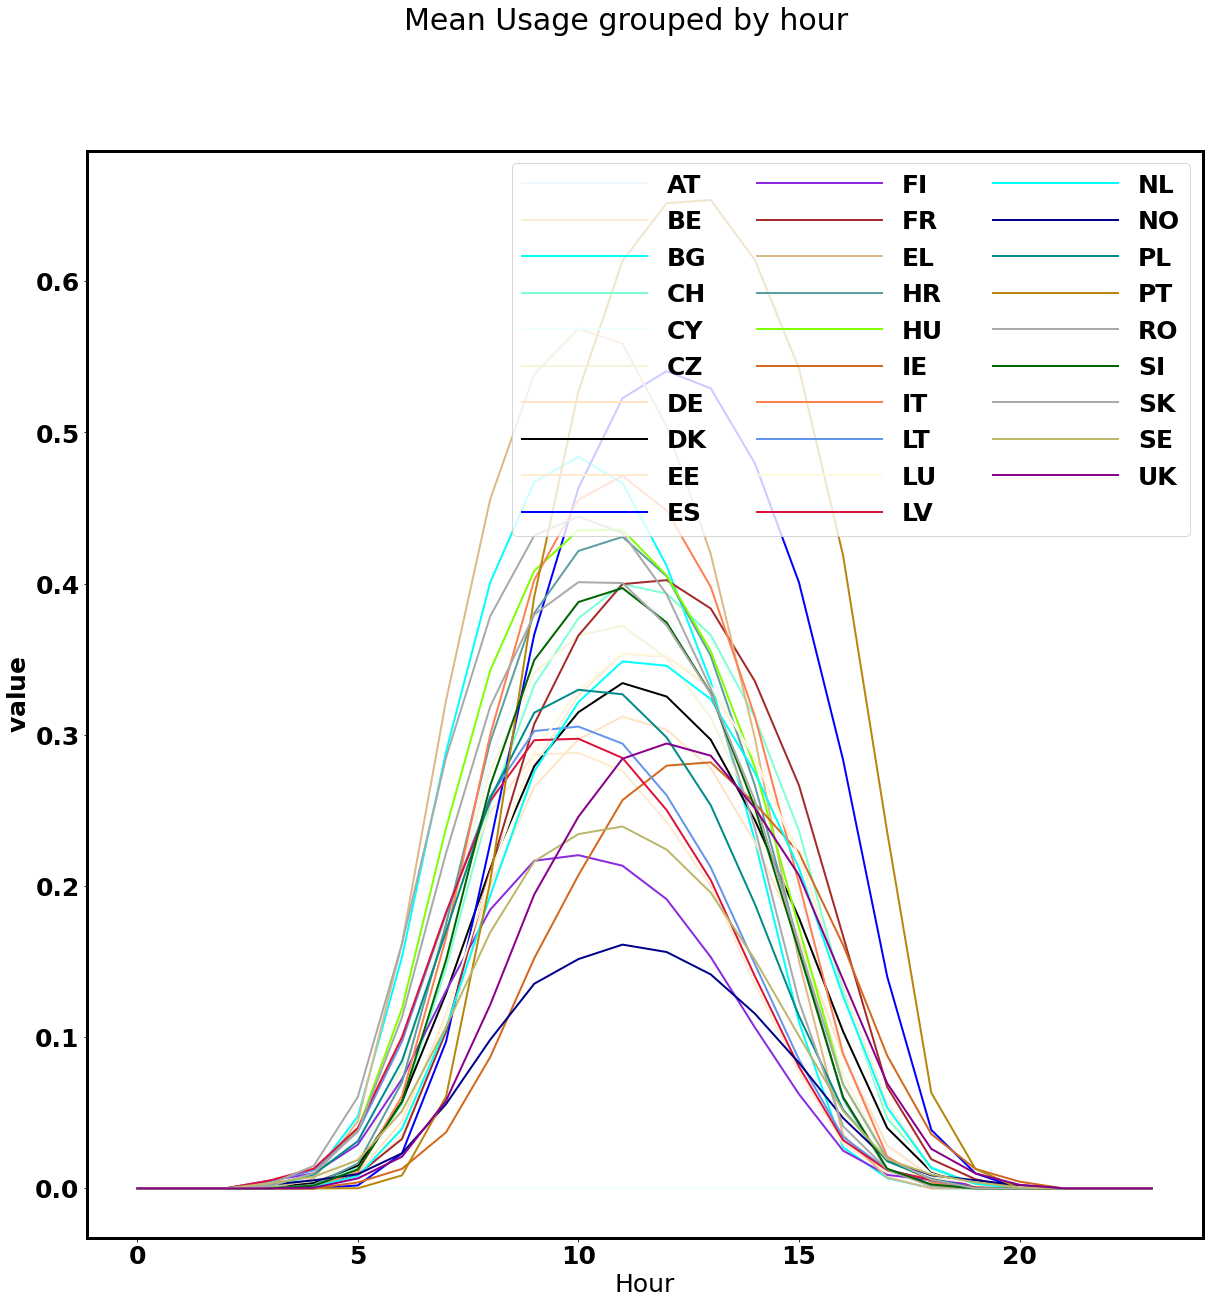

In [5]:
plot_path="./"
import matplotlib
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
color_array = list(mcolors.CSS4_COLORS.keys())
df = EMHIRESPV_TSh_CF_Country_19862015

names_array = list(df.keys()[:29])


## group by hours
# A rough visualization of the data
import warnings
warnings.filterwarnings('ignore')


df['hours'] = df['time_stamp'].dt.hour



from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


plt.subplot(1,1,1)



for i in range(len(names_array)):
    #print("Doing %d"%i)
    plt.plot(df.groupby('hours').mean().index,df.groupby('hours').mean()[names_array[i]],color_array[i],label=names_array[i],linewidth=2,markersize=5)
    




plt.xlabel("Hour")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Mean Usage grouped by hour")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,20)
plt.legend(fontsize=25,handlelength=5,ncol=3)
#save_path = plot_path + "Data_EU_group_by_hour" + ".png"

#fig.savefig(save_path, dpi=200)








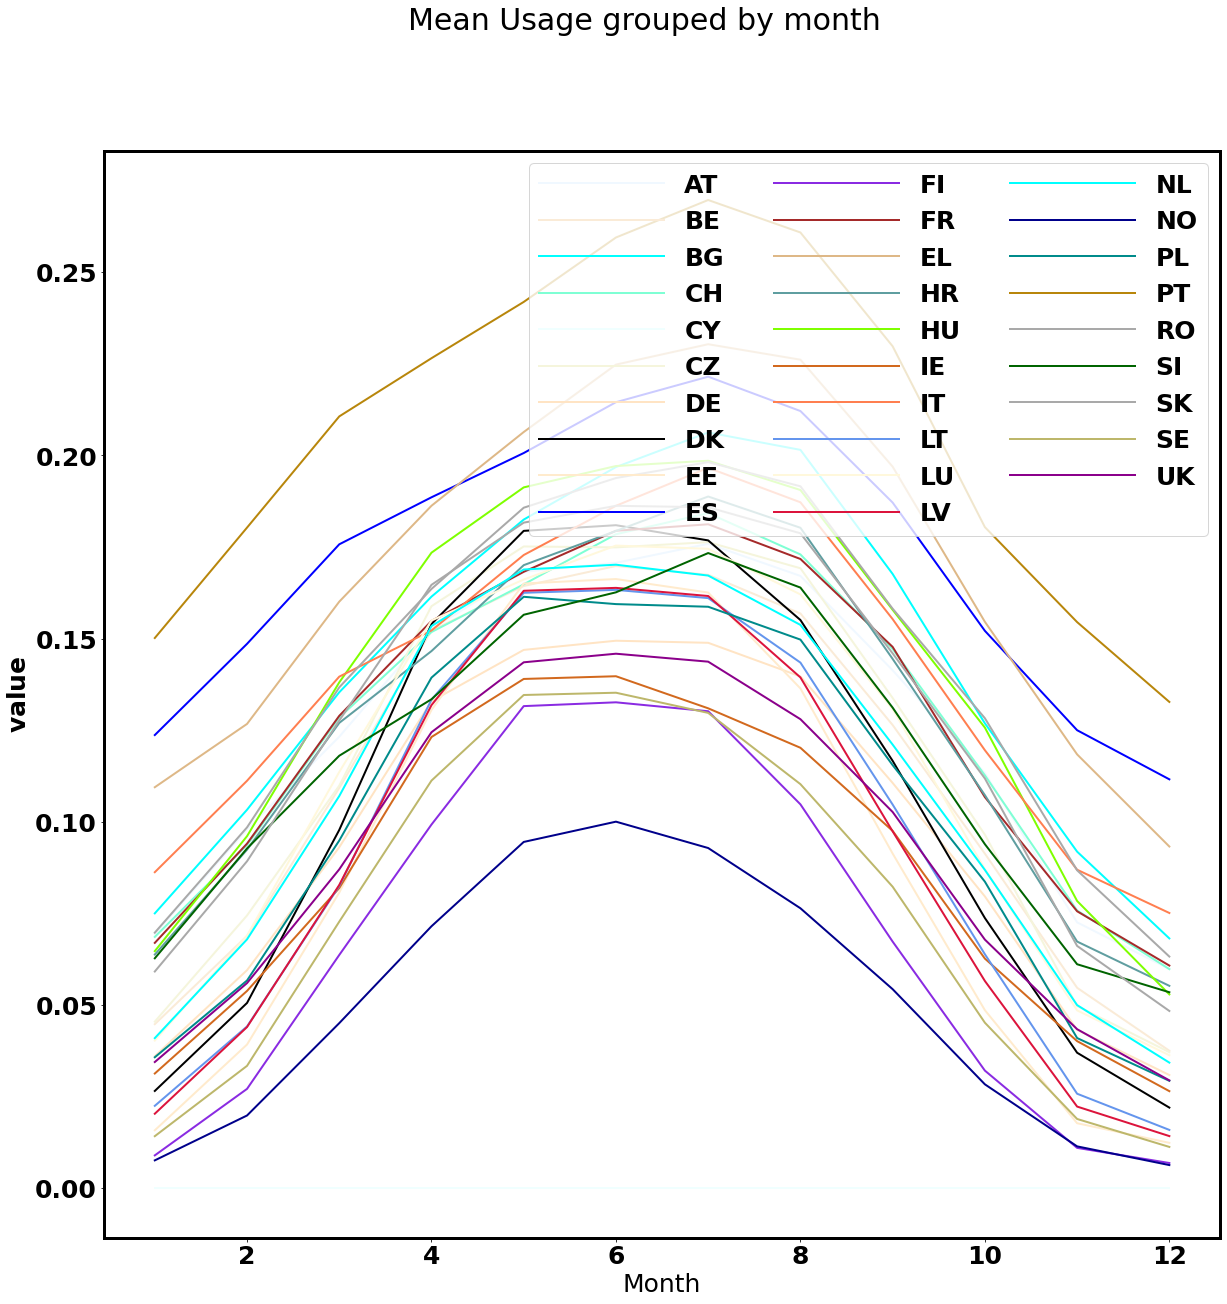

In [6]:
from matplotlib import colors as mcolors
color_array = list(mcolors.CSS4_COLORS.keys())

df = EMHIRESPV_TSh_CF_Country_19862015

names_array = list(df.keys()[:29])


## group by hours
# A rough visualization of the data
import warnings
warnings.filterwarnings('ignore')


df['hours'] = df['time_stamp'].dt.hour
df['month'] = df['time_stamp'].dt.month



from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


plt.subplot(1,1,1)



for i in range(len(names_array)):
    #print("Doing %d"%i)
    plt.plot(df.groupby('month').mean().index,df.groupby('month').mean()[names_array[i]],color_array[i],label=names_array[i],linewidth=2,markersize=5)
    




plt.xlabel("Month")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Mean Usage grouped by month")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(20,20)
plt.legend(fontsize=25,handlelength=5,ncol=3)
plt.show()


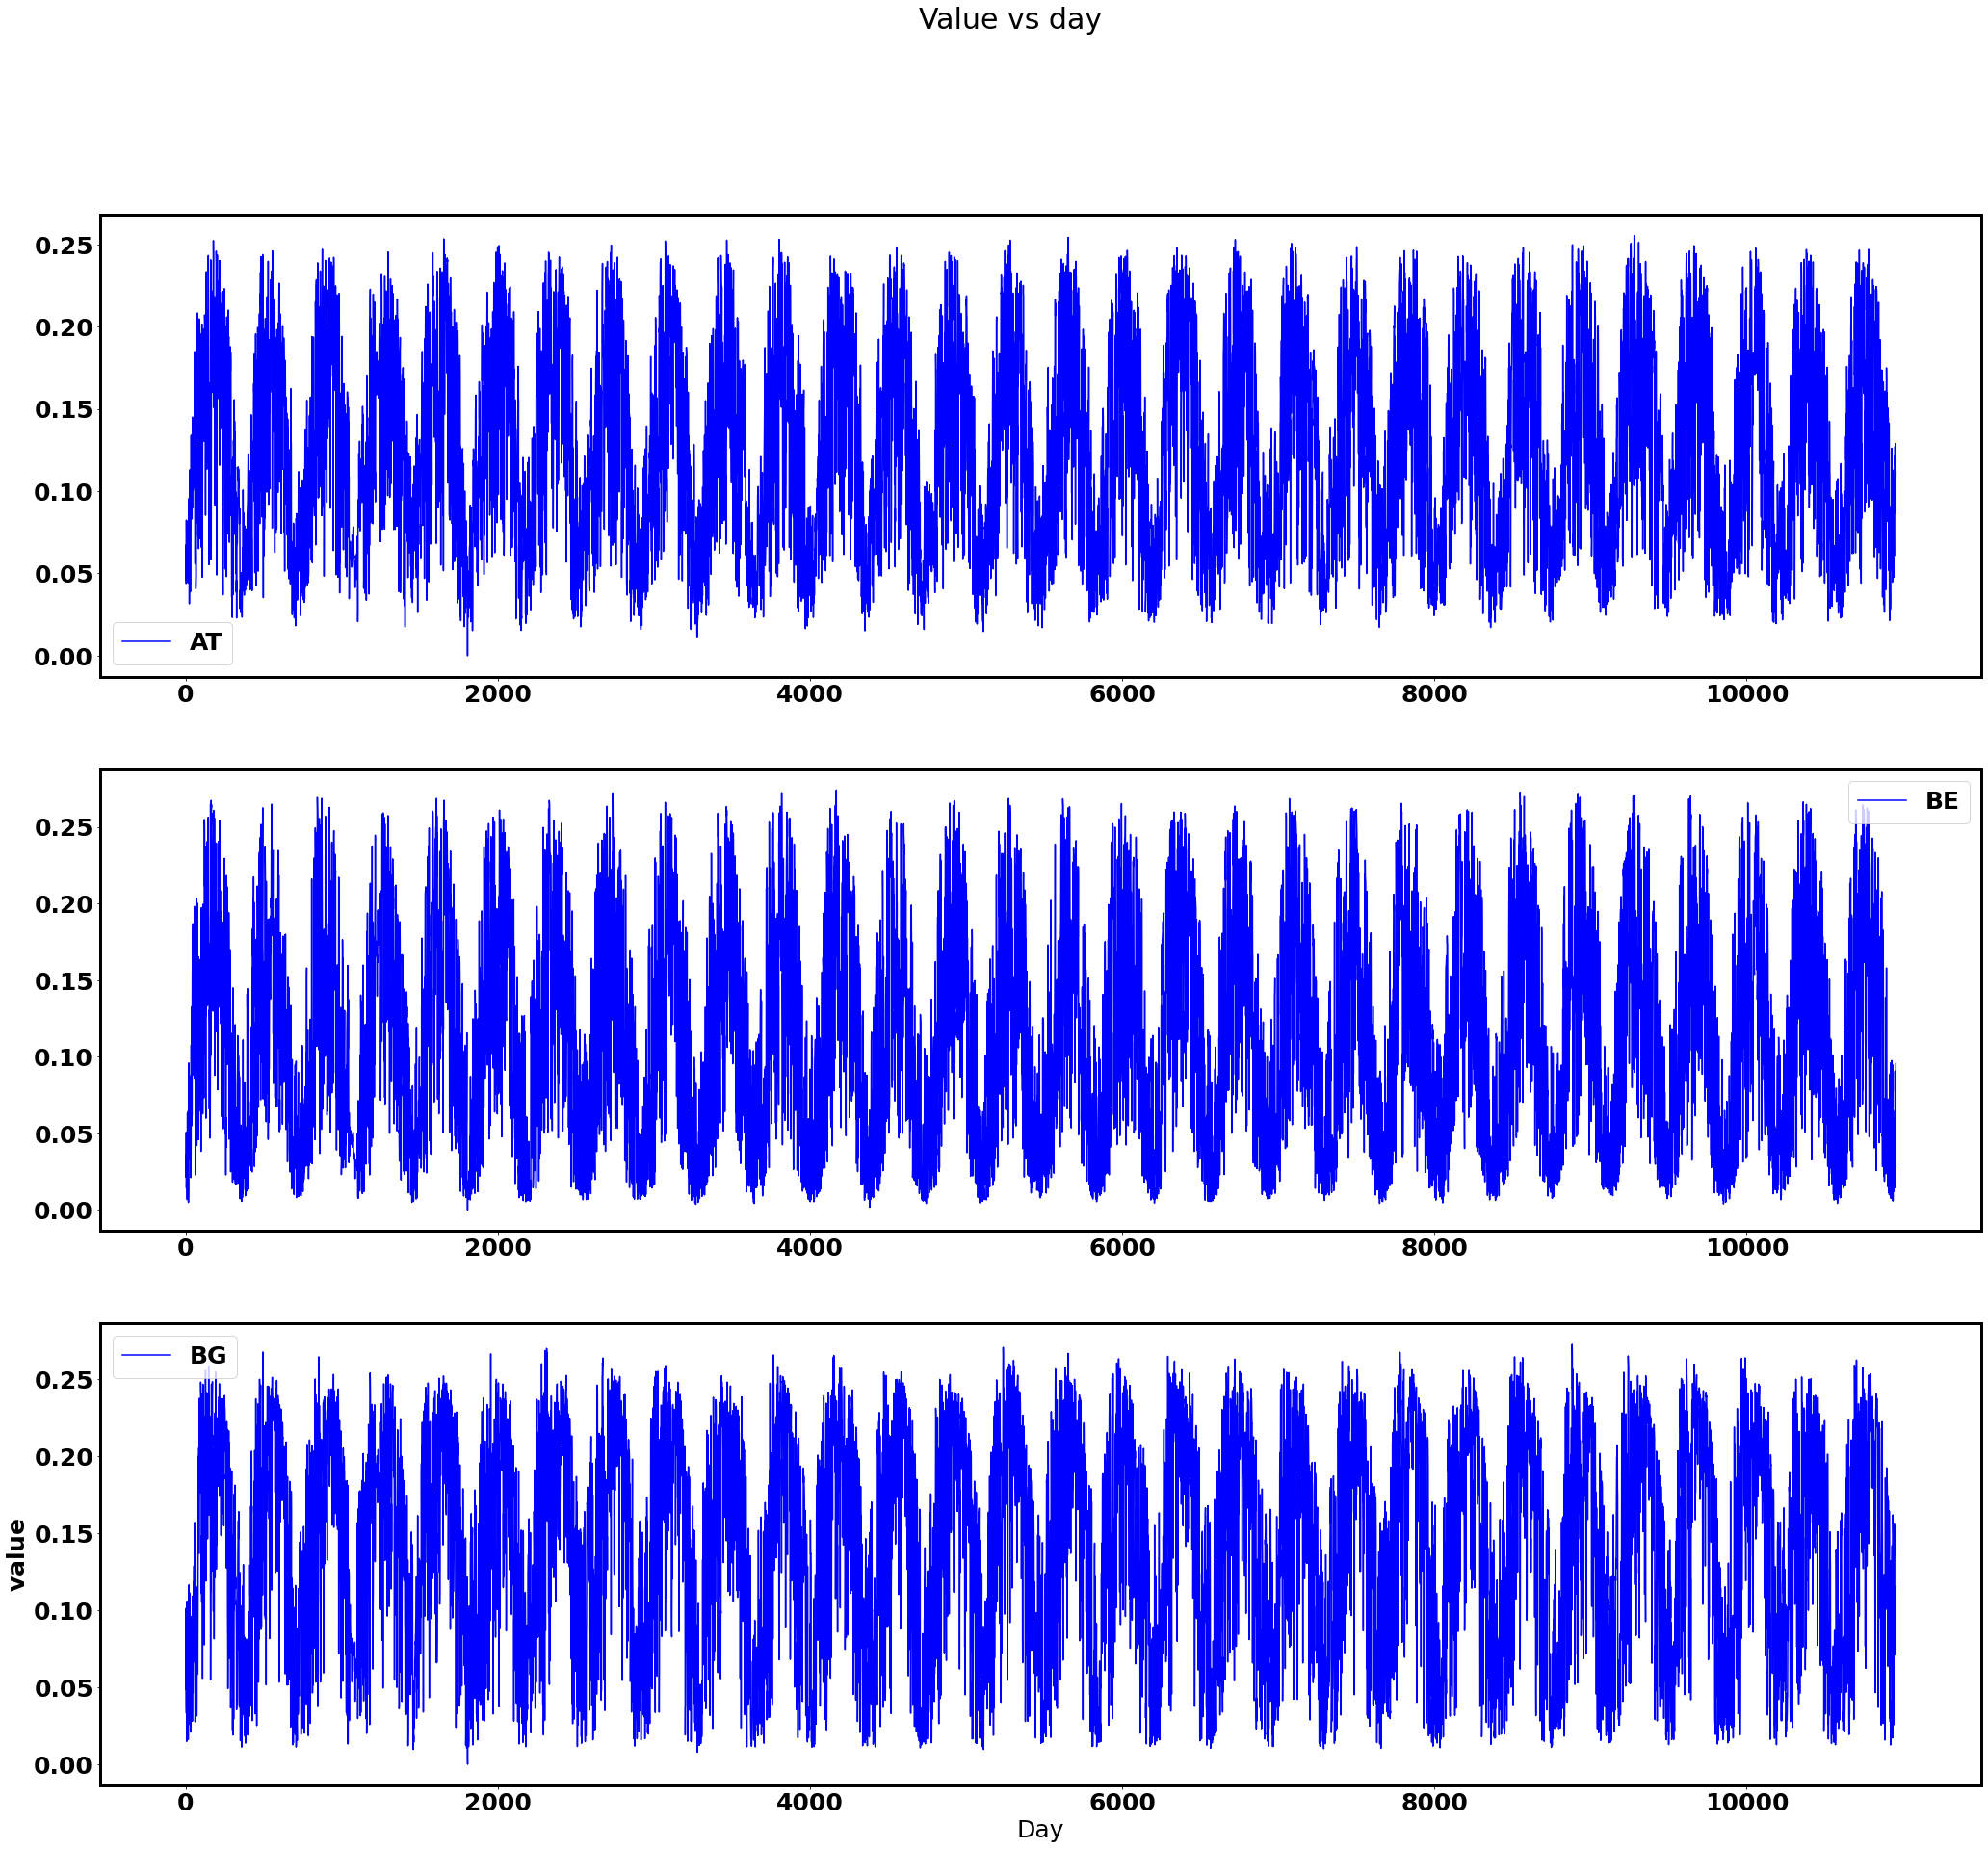

In [7]:
# Let's find out the peroid inside:
# PLOT VS DAY
df["day_delta"] = np.arange(0,df.shape[0],1)//24





from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


for i in range(3):
    plt.subplot(3,1,1+i)

    plt.plot(df.groupby("day_delta").mean()[names_array[i]],"b",label=names_array[i])
    plt.legend()




plt.xlabel("Day")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Value vs day")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(35,30)

plt.show()

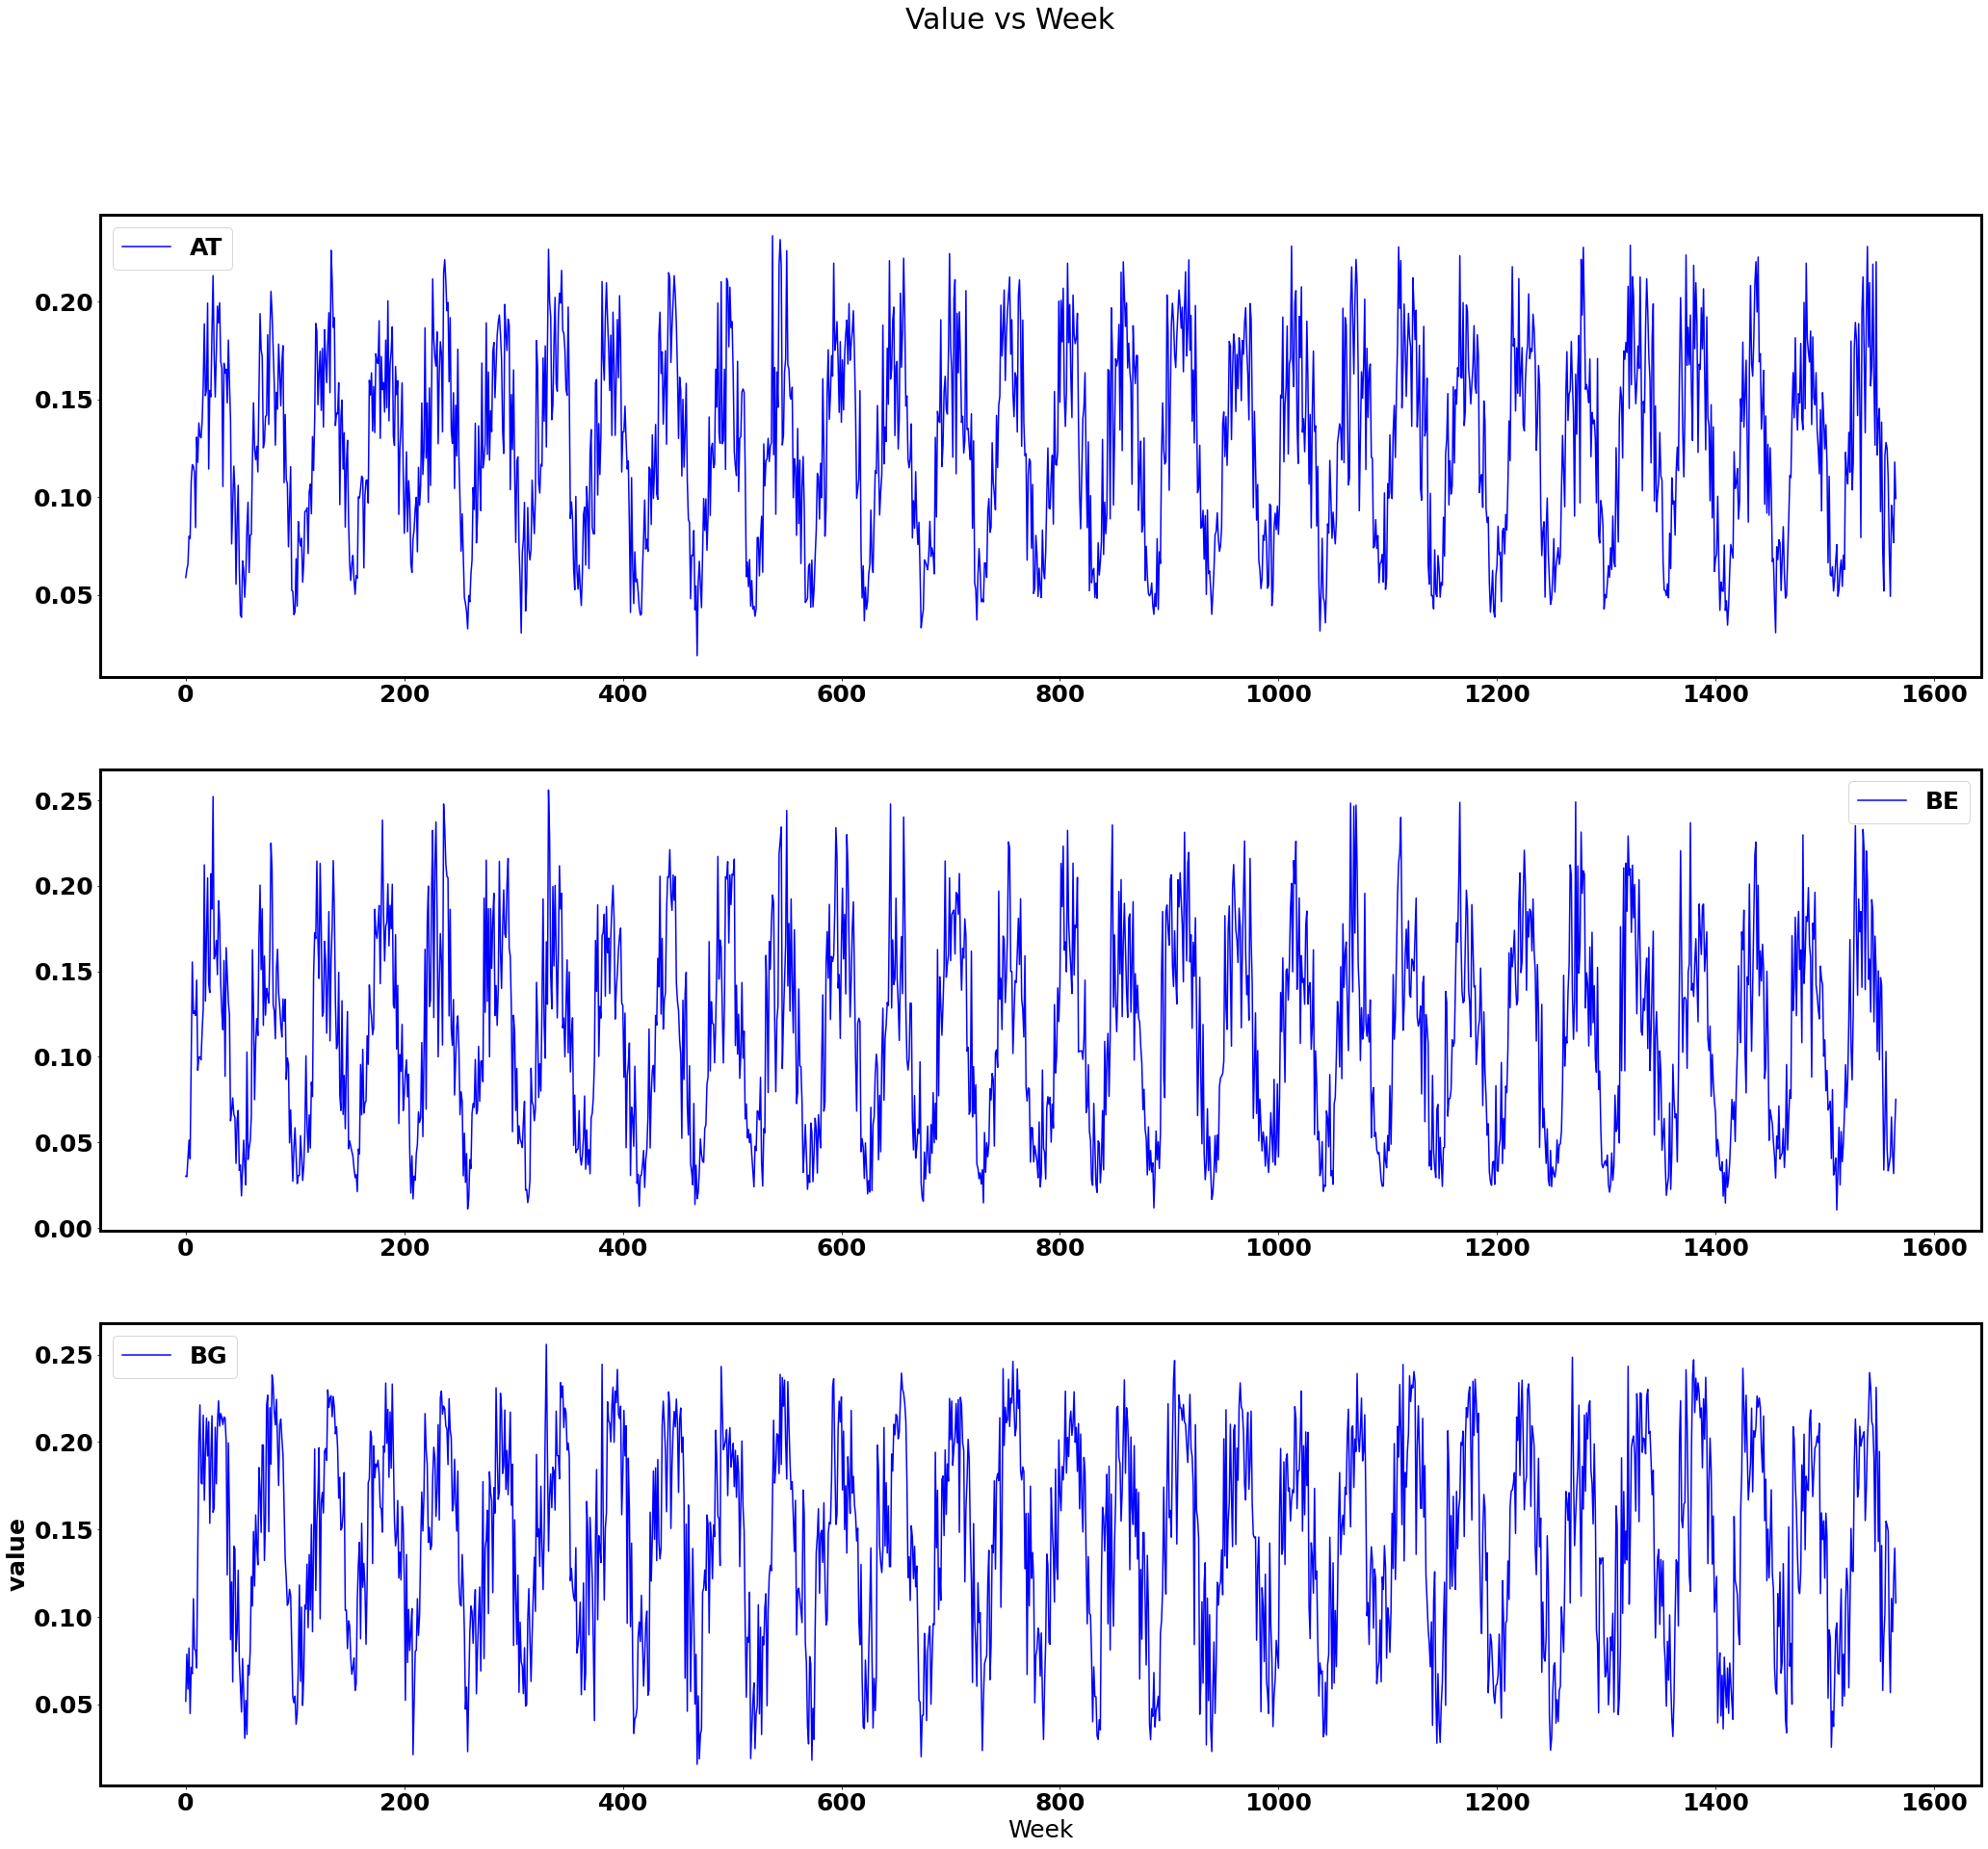

In [8]:
# PLOT VS Month
df["week_delta"] = np.arange(0,df.shape[0],1)//(24*7)





from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


for i in range(3):
    plt.subplot(3,1,1+i)

    plt.plot(df.groupby("week_delta").mean()[names_array[i]],"b",label=names_array[i])
    plt.legend()




plt.xlabel("Week")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Value vs Week")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(35,30)

plt.show()

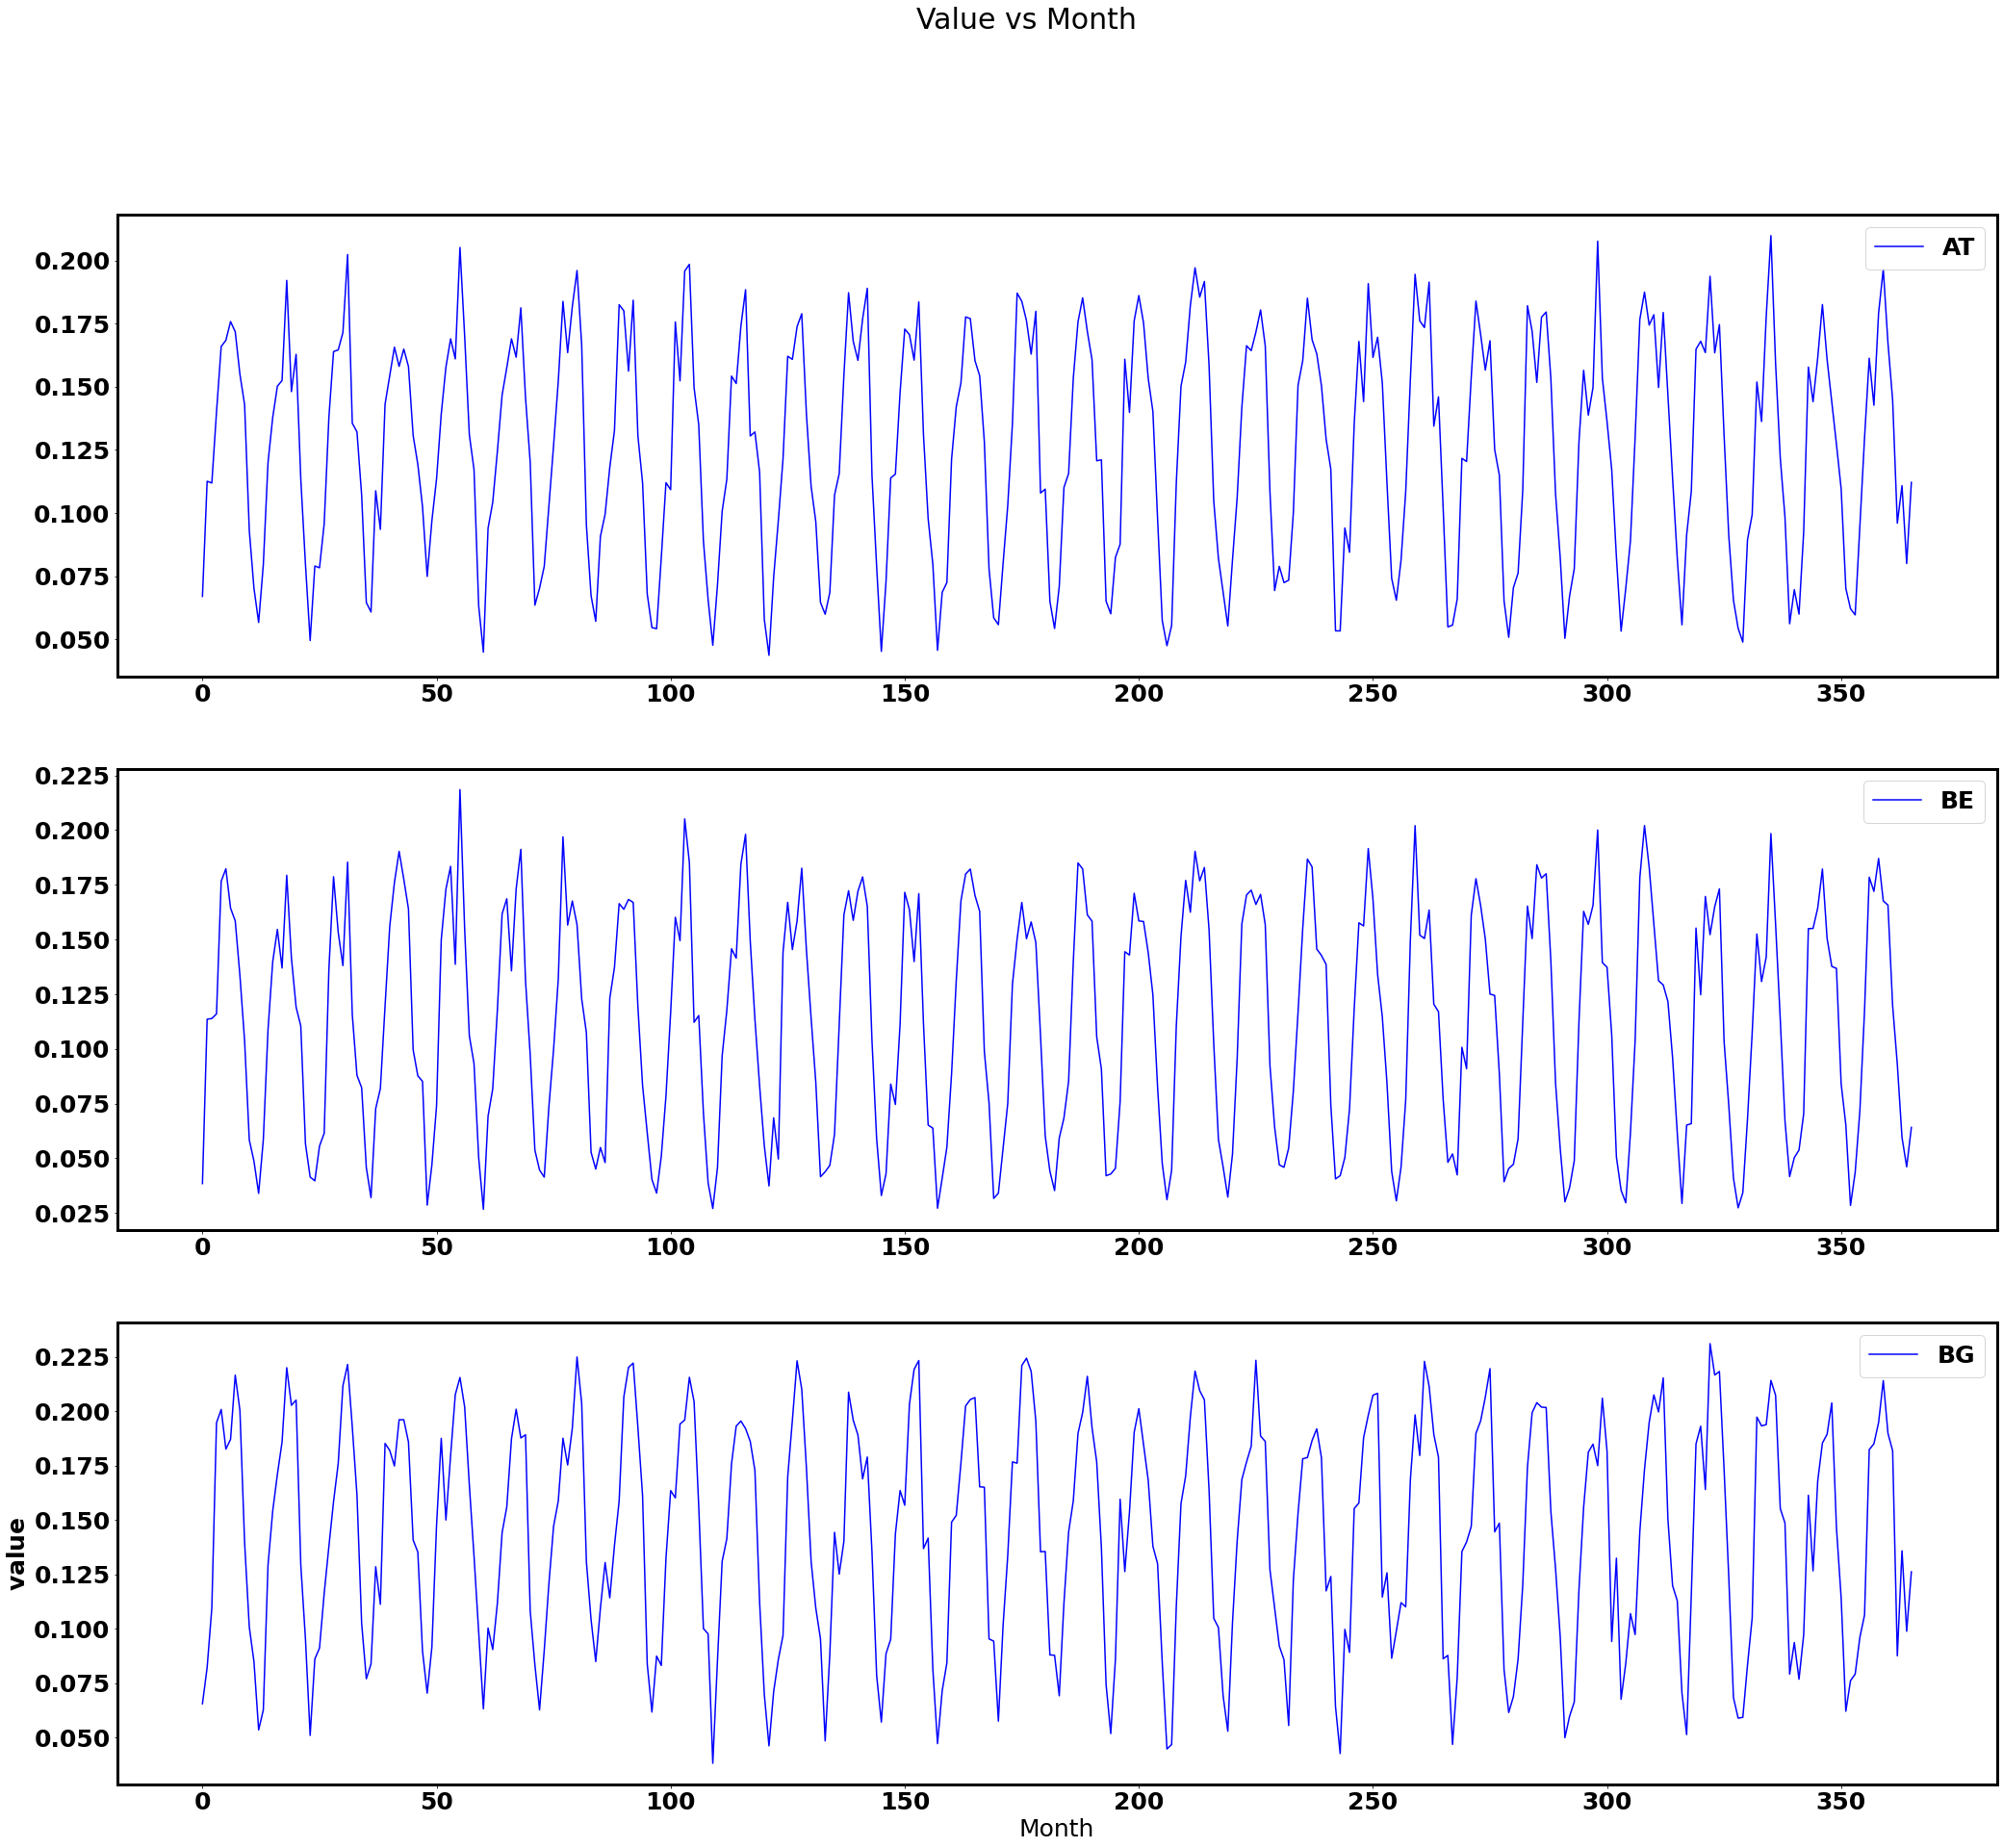

In [9]:
# PLOT VS Month
df["month_delta"] = np.arange(0,df.shape[0],1)//(24*30)


from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


for i in range(3):
    plt.subplot(3,1,1+i)

    plt.plot(df.groupby("month_delta").mean()[names_array[i]],"b",label=names_array[i])
    plt.legend()




plt.xlabel("Month")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Value vs Month")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(35,30)
plt.show()

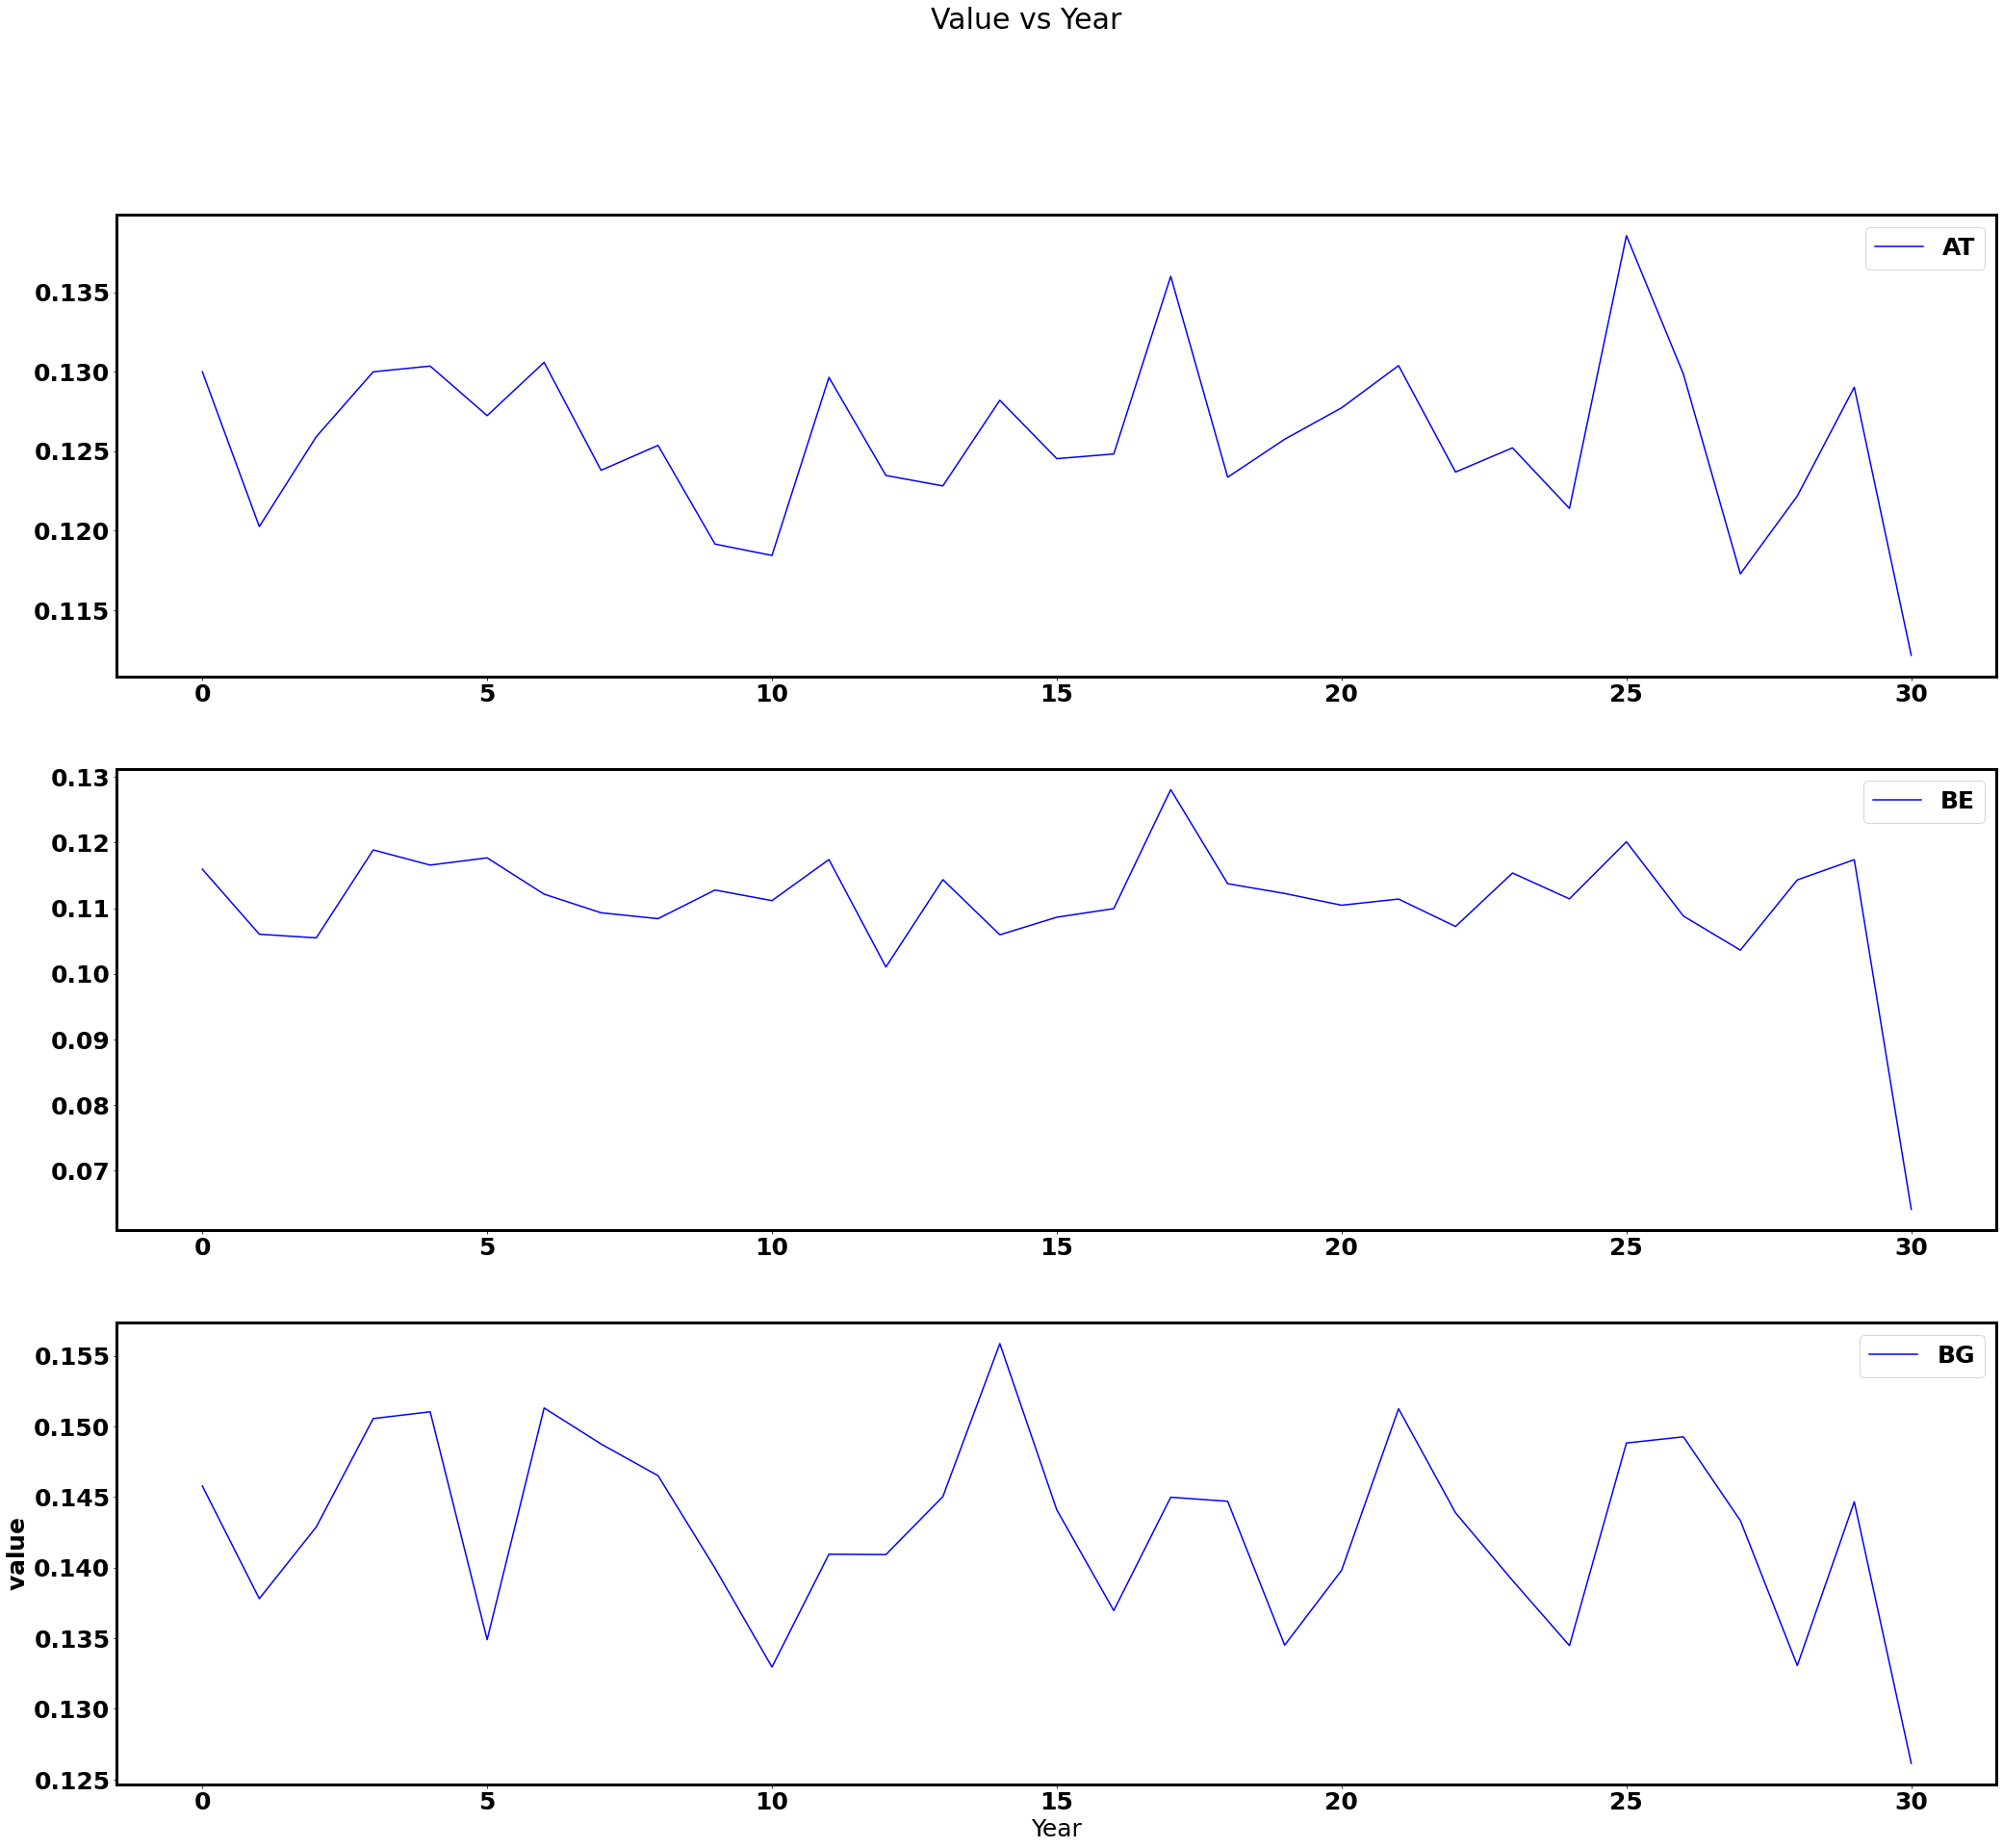

In [10]:
# PLOT VS year
df["year_delta"] = np.arange(0,df.shape[0],1)//(24*365)


from matplotlib.pylab import rc
font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)


for i in range(3):
    plt.subplot(3,1,1+i)

    plt.plot(df.groupby("year_delta").mean()[names_array[i]],"b",label=names_array[i])
    plt.legend()




plt.xlabel("Year")
plt.ylabel(r"${\rm value}$")
plt.suptitle("Value vs Year")

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(35,30)

plt.show()

In [11]:
# Next step: predict future trend using Transformer.

# Now Let's apply the Transformer in single dimension Time series prediction

Reference: https://www.tensorflow.org/tutorials/text/transformer

In [12]:
import tensorflow as tf
import os

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 



In [13]:
# scale dot attention:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    # Dimension of k
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  
    # calculate attention weight:
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

# Multi-head Attention:
# This is what we use
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        
        # Always use Super to inheriatte and avoid extra code.
        assert d_model%num_heads==0
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        # sanity check:
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        # Q K W:
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
    def split_heads(self, x, batch_size):
        # Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
        
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
        
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        # https://www.tensorflow.org/api_docs/python/tf/transpose : perm
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        return output, attention_weights
    
    
        
        



In [14]:
## Encoder decoder for Time series:

# pointwise feed forward network
def point_wise_feed_forward_network(d_model, dff):
    # Two FC layers:
    return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

# Change embedding since it's not int anymore:
class EmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self,embedding_size):
        super(EmbeddingLayer,self).__init__()
        self.embedding_size=embedding_size

    def build(self,input_shape):
        with tf.name_scope('embedding'):
            self.shared_weights=self.add_weight(name='weights',
                                                shape=[input_shape[-1],self.embedding_size],
                                                initializer=tf.random_normal_initializer(mean=0.,
                                                                                         stddev=self.embedding_size ** -0.5))
        super(EmbeddingLayer,self).build(input_shape)


    def call(self,x):
        y=tf.einsum('bsf,fk->bsk',x,self.shared_weights)
        return y
    

class EncoderLayer(tf.keras.layers.Layer):
    # Here we use a 0.1 dropout rate as default
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
        return out2
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(tf.random.uniform((64, 43, 512)), False, None)

print(sample_encoder_layer_output.shape)  # (batch_size, input_seq_len, d_model)

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

        return out3, attn_weights_block1, attn_weights_block2



(64, 43, 512)


In [15]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                              np.arange(d_model)[np.newaxis, :],
                              d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                                self.d_model)


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
    
        # adding embedding and position encoding.
        #print("Check",x.shape)
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        #x = tf.keras.layers.Dense(self.d_model)(x)
        #print("check 2",x.shape)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        #print("check 3",x.shape)

        x = self.dropout(x, training=training)
        #print("check 4",x.shape)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
        return x  # (batch_size, input_seq_len, d_model)
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        #x = tf.keras.layers.Dense(self.d_model)(x)
        
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                 look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights
    

In [16]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_seq_size, 
               output_seq_size, input_delta_t, output_delta_t, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                               input_seq_size, input_delta_t, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                               output_seq_size, output_delta_t, rate)
        
        # Now it output one cell: we ignore sigma for now and only miu

        #self.final_layer = tf.keras.layers.Dense(output_seq_size)
        self.final_layer = tf.keras.layers.Dense(1)
        
        # Optional: Add sigma to model
        #self.final_layer_sigma = tf.keras.layers.Dense(1)


    def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
        #print("check encoder size",enc_output.shape)

    
        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        
        #print("check decoder size",dec_output.shape)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

        return final_output, attention_weights



In [17]:
# sanity check:
# We encoder the float32 input to input_seq_size/output_seq_size integers
# The output is a sliding time table for different time scale prediction:
# Eg: you need to make sure your prediction delta_t<output delta_t and input data delta_t < input_delta_t
# For GTX 1060 we can set batch=16 and use 4X batch size for Tesla P40

batch = 8

sample_transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_seq_size=1000, output_seq_size=1000, 
    input_delta_t=1440, output_delta_t=240)

# input: batch+sequence length
# biggest length for in/out put is pe_input,  pe_target
temp_input = tf.random.uniform((batch, 720), dtype=tf.int64, minval=0, maxval=1000)
temp_target = tf.random.uniform((batch, 3), dtype=tf.int64, minval=0, maxval=1000)

#temp_input = tf.cast(temp_input,dtype=tf.float32)
#temp_target = tf.cast(temp_target,dtype=tf.float32)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

print("final output size",fn_out.shape)  # (batch_size, tar_seq_len, target_vocab_size)

final output size (8, 3, 1)


In [58]:
# Let's do a three variables version
df = EMHIRESPV_TSh_CF_Country_19862015
names_array = df.keys()
# Let's do a three variables version

temp = df[names_array[:3]].values

# normalize first

temp = (temp - temp.min(axis=0)) / (temp.max(axis=0) - temp.min(axis=0))

lower, upper = 0, 999
temp = lower + (upper - lower) * temp
temp = np.array(temp,dtype=int)

# Longer peroid

delta_t = 420
delta_t_out = 60



# prepare data: fow now I only use 1D data, but it can be extended to multiple channel:

# Normalize to 0-1000

#X = np.zeros((temp.shape[0]-delta_t-delta_t_out,delta_t*temp.shape[1]),dtype=int)


for j in range(temp.shape[1]):
    for i in range(delta_t_out):
        if i==0 and j==0:
            y = temp[delta_t:-delta_t_out,j]
        else:
            y = np.c_[y,temp[delta_t+i:-(delta_t_out-i),j]]
    
    

for j in range(temp.shape[1]):
    for i in range(delta_t):
        if i%300==0:
            print("Doing %.2f percent"%((100*i+100*j*delta_t)/delta_t/temp.shape[1]))
        if i==0 and j==0:
            X = temp[delta_t_out:-delta_t,j]
        else:
            X = np.c_[X,temp[delta_t_out+i:-(delta_t-i),j]]
    
    

X = np.atleast_3d(X)
print("Data ready")
#train_dataset_TS = tf.data.Dataset.from_tensor_slices((X,y))

Prepare data 0.00 percent
Prepare data 19.06 percent
Prepare data 38.12 percent
Prepare data 57.18 percent
Prepare data 76.25 percent
Prepare data 95.31 percent


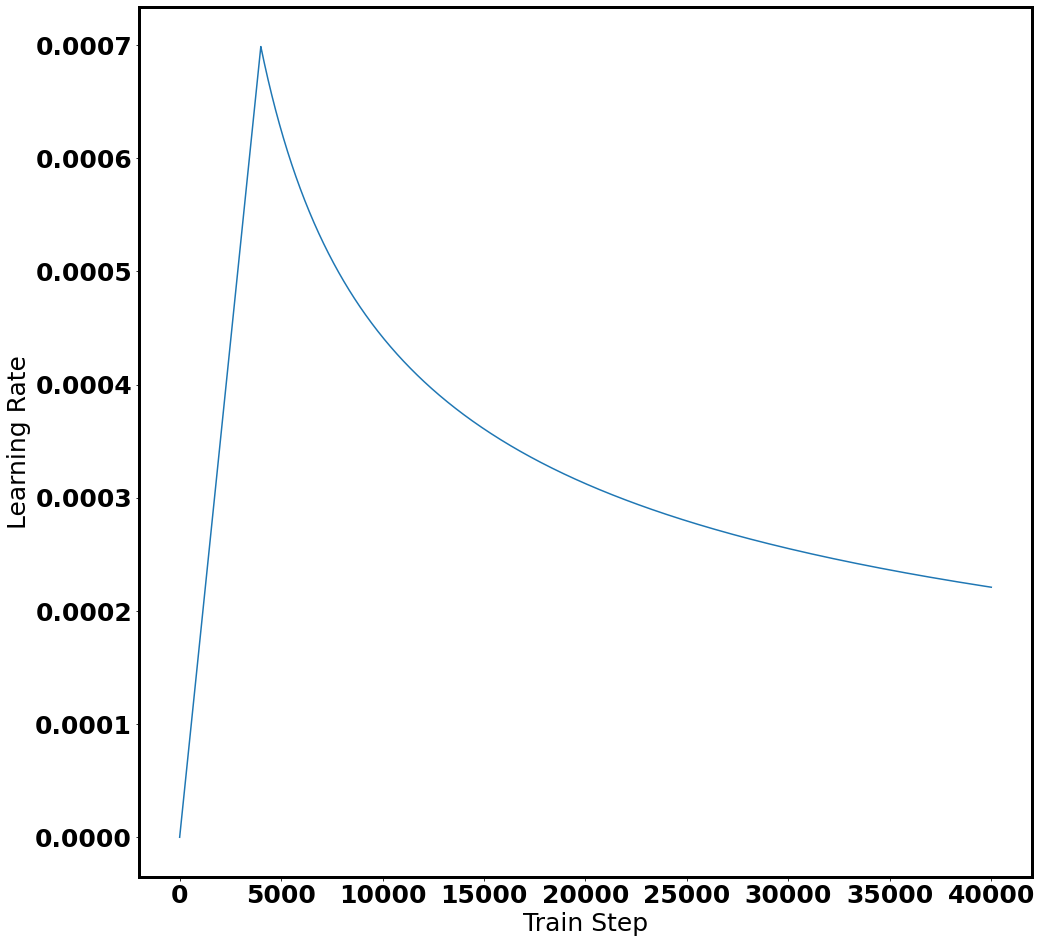

In [59]:
## Optimizor:
import matplotlib.pyplot as plt

d_model=512

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
    
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
        
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
    
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)
# Learning rate curve:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
fig = matplotlib.pyplot.gcf()

fig.set_size_inches(16,16)
plt.show()

In [60]:
# Loss function:
# loss and metric

# For now I use sparse-cross entropy. But MAE may make more sense here:

loss_object = tf.keras.losses.MeanSquaredError(reduction='none')


def loss_function(real, pred):
    #mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    #mask = tf.cast(mask, dtype=loss_.dtype)
    #loss_ *= mask
  
    return tf.reduce_sum(loss_)/tf.cast(len(loss_),dtype=tf.float32)




train_loss = tf.keras.metrics.Mean(name='train_loss')


train_accuracy = tf.keras.metrics.MeanSquaredError(name='mean_squared_error',dtype=tf.float32)



# Optional
#train_accuracy = tf.keras.metrics.MeanSquaredError(name='train_MSE')






In [61]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # (seq_len, seq_len)

def create_masks(inp, tar):
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by 
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

      
    return enc_padding_mask, combined_mask, dec_padding_mask

In [97]:




batch = 8

transformer = Transformer(
    num_layers=2, d_model=512, num_heads=8, dff=2048, 
    input_seq_size=1000, output_seq_size=1000, 
    input_delta_t=2400, output_delta_t=240)



# save file: optional
import os

checkpoint_path = "checkpoints/train_TS_EU"
os.system("mkdir %s"%checkpoint_path)

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')



train_step_signature = [
        tf.TensorSpec(shape=(None, None), dtype=tf.int64),
        tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    ]

@tf.function(input_signature=train_step_signature)

def train_step(inp, tar):
        
    tar_inp = tar
    tar_real = tar

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    with tf.GradientTape() as tape:
        # No mask for now : Optional
        enc_padding_mask, combined_mask, dec_padding_mask = None,None,None
        predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
        predictions = predictions[:,:,0]
        loss = loss_function(tar_real, predictions)
        ## Optional: Add MSE error term. Since the number in SCCE doesn't make sense. Add MSE to punish far away dots like 0 and 999
        #predictions_id = tf.argmax(predictions, axis=-1)
        #loss+=float(tf.reduce_sum(tf.keras.losses.MSE(tar,predictions_id))/(10000*batch))
        #value = float(tf.reduce_sum(tf.keras.losses.MSE(tar,predictions_id))/(1*batch))
        # Avoid gradient exploding
        """
        if not loss>0:
            value=float(100000)
        loss+=value
        
        """
        
        
        # Or we can only use MSE loss.
        
    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(tar_real, predictions)











In [ ]:
"""
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)



"""




#Train and save:

import time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

EPOCHS = 10
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
batch=8

N = len(y_train)

for epoch in range(EPOCHS):
    start = time.time()
  
    train_loss.reset_states()
    train_accuracy.reset_states()
    for i in range(N//batch):
        inp, tar=X_train[batch*i:min(batch*i+batch,N),:,0],y_train[batch*i:min(batch*i+batch,N)]
        tar = np.atleast_2d(tar)
        lo = train_step(inp, tar)
        if i%500==0 and epoch%2==0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
            print("Doing %d (%d) batch in epoch %d "%(i,N//batch,epoch))

            #print("Loss",train_loss.result(), "MSE",train_accuracy.result())
            print("MSE",train_accuracy.result())
    
  

In [ ]:
# testing:
N_test = len(y_test)


for i in range(N_test//batch):
    if i%1000==0:
            print("Doing %d (%d)"%(i,N_test//batch))
    
    inp, tar=X_test[batch*i:min(batch*i+batch,N),:,0],y_test[batch*i:min(batch*i+batch,N)]
    tar = tar
    tar_inp = tar
    tar_real = tar

    # enc_padding_mask, combined_mask, dec_padding_mask = None,None,None
    
    predictions, attention_weights = transformer(inp, 
                                                 tar,
                                                 False,
                                                 None,None,None)
    if i==0:
        y_pred_all = predictions
    else:
        y_pred_all = np.r_[y_pred_all,predictions]


    
y_pred_all = np.array(y_pred_all)

print("Train+Test all set!")

In [ ]:
# Convert testing to -1*60*3
np.save("y_pred_all_60_3para.npy",y_pred_all)
np.save("y_test_all_60_3para.npy",y_test)

In [ ]:
#y_pred_all.shape
y_test.shape

In [ ]:
y_pred_all = y_pred_all[:,:,0]
plot_path = "plots/"

y_test = y_test[:y_pred_all.shape[0]]


import matplotlib
from matplotlib.pylab import rc


font = {'family': 'normal','weight': 'bold',
        'size': 25}

matplotlib.rc('font', **font)
rc('axes', linewidth=3)

bin_size = y_pred_all.shape[1]//temp.shape[1]

for i in range(temp.shape[1]):
    plt.subplot(temp.shape[1],1,1+i)
    y_pred_all_part = y_pred_all[:,i*bin_size:(i+1)*bin_size]
    y_pred_1d = y_pred_all_part[np.arange(0,y_pred_all.shape[0],bin_size),:]

    y_test_part = y_test[:,i*bin_size:(i+1)*bin_size]
    
    plt.plot(y_test_part[:1000,0],"k",label="Data")
    plt.plot(y_pred_1d.ravel()[:1000],"r",label="Prediction-Transformer-60")
    diff = y_test[:1000,0]-y_pred_1d.ravel()[:1000]
    plt.plot(diff,"b",label="Difference")


    plt.xlabel("Hour")
    plt.ylabel(r"%s"%names_array[i])
    plt.suptitle("Value vs Hour")
    plt.legend()

fig = matplotlib.pyplot.gcf()


fig.set_size_inches(35,12*temp.shape[1])
plt.savefig(plot_path+"EU_Transformer_60_3para.png")


In [ ]:
print("All set :)")